In [2]:
# Importing necessary libraries

# Nearest neighbors will be the v1 model for sound drip
# will give logistic regressiona nd 
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from joblib import dump
from joblib import load
import pickle
import numpy as np

import pandas as pd
from pandas.io.json import json_normalize

# textblob will be used to perform sentiment analysis down the road
# from textblob import TextBlob

# # Data is large and will need to be unzipped
# import zipfile

# # unzipping file
# with zipfile.ZipFile("./data_collection/final_data/DF_v1.pkl.zip","r") as zip_ref:
#     zip_ref.extractall(".")

# reading in pickled data
# song_list = pd.read_pickle("./DF_v1.pkl")

In [3]:
# ALERT - THIS COULD POTENTIALLY BE USED TO PERFORM SENTIMENT ANALYSIS ON LYRICS DATA IN v2. FOR v1, DISREGARD

# # creating polarity and subjectivity lists to be populated

# lyrics_polarity = []
# lyrics_subjectivity = []

# # using a for loop to populate polarity and subjectivity lists
# for title in song_list_df["lyrics"]:
#     try:
#         blob_test = TextBlob = TextBlob(title)
#         blob_sentiment = blob_test.sentiment
#         # appending results to lists above
#         lyrics_polarity.append(blob_sentiment[0])
#         lyrics_subjectivity.append(blob_sentiment[1])
#     except:
#         lyrics_polarity.append(0)
#         lyrics_subjectivity.append(0)

# # adding polarity and subjectivity to df
# song_list['lyrics_polarity'] = lyrics_polarity
# song_list['lyrics_subjectivity'] = lyrics_subjectivity

# Loading Latest PKL

In [86]:
# song_list = pickle.load("./DF_genres_hashed.pkl","rb")

X = pickle.load(open("./data/song_list_v4_hashed.pkl", "rb"))

In [87]:
X.head()

,songid,popularity,availability,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,...,40,41,42,43,44,45,46,47,48,49
0,5PS5dpaLogPzYU9hWiWyZb,0,1,0.001300,Karkkiautomaatti,0.487,157307.0,0.678,0.055100,9.0,...,0.0,-1.0,1.0,2.0,-3.0,0.0,0.0,0.0,0.0,-2.0
1,41RpZW2lxAdnqDd2nMBzLQ,15,1,0.000045,Hudson Mohawke,0.662,138960.0,0.823,0.952000,4.0,...,0.0,-4.0,5.0,7.0,-4.0,-1.0,0.0,0.0,0.0,-7.0
2,3GsS8jzoixpCnp4jDWCEvb,17,1,0.002760,Kris Kross,0.859,221200.0,0.741,0.000000,11.0,...,0.0,-3.0,0.0,1.0,-2.0,-1.0,0.0,0.0,0.0,-1.0
3,0kq75szR7uDEYrZkT2c4Ry,21,1,0.348000,Jorge Negrete,0.361,173573.0,0.483,0.000003,7.0,...,0.0,-2.0,1.0,2.0,-1.0,2.0,0.0,0.0,0.0,0.0
4,2HyFpkX9J7vv3OZNDaraHZ,1,1,0.340000,Tiger Lou,0.533,318467.0,0.302,0.179000,10.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-2.0


# Remove two NaN Values

In [32]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id='63594c9b2f99411a8cbd18df04851fc4',client_secret='096168b2bd1f4378ae410726955c9ed8')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
def get_popularity(trackID):
    return sp.track(trackID)['popularity']

In [33]:
get_popularity('5gNNUKhBzakQrbu8UaLori')

18

In [34]:
X.loc[202786, 'popularity'] = 18

X.loc[202786]['popularity']

18

In [35]:
get_popularity('25DO8ImBd90EhKEKuntxqN')

0

In [36]:
X.loc[189355, 'popularity'] = 0

X.loc[189355]['popularity']

0

In [39]:
X["genres_stripped"]

0                             'finnish indie', 'suomi rock'
1         'bass music', 'scottish electronic', 'scottish...
2                        'hip hop', 'new jack swing', 'rap'
3                          'bolero', 'mariachi', 'ranchera'
4                                      'swedish indie rock'
                                ...                        
574013    'art pop', 'brooklyn indie', 'chamber pop', 'd...
574014                                        'lo-fi beats'
574015    'contemporary country', 'country pop', 'heartl...
574016    'garage rock', 'indie pop', 'indie rock', 'mod...
574017    'ccm', 'christian music', 'world worship', 'wo...
Name: genres_stripped, Length: 574018, dtype: object

# Picking Final Updated DF

In [42]:
# X = X.drop(["availability"], axis=1)

In [43]:
# filename2 = './data/song_list_v5_hashed.pkl'
# pickle.dump(X, open(filename2, 'wb'))

# Preparing for Scaling

In [44]:
# dropping unnecessary columns
X = X.drop(["songid","artist","track", "duration_ms","genres","genres_stripped"], axis=1)

# checking that they're dropped
X.shape

(574018, 63)

In [45]:
columns_for_scaling = X.columns[0:13]

In [46]:
columns_genre_hashed = X.columns[13:]

In [47]:
X[columns_for_scaling]

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,0.001300,0.487,0.678,0.055100,9.0,0.0846,-7.780,1.0,0.0495,149.940,4.0,0.8700
1,15,0.000045,0.662,0.823,0.952000,4.0,0.3430,-1.711,0.0,0.0662,177.745,4.0,0.6210
2,17,0.002760,0.859,0.741,0.000000,11.0,0.3250,-12.329,0.0,0.2710,98.082,4.0,0.5290
3,21,0.348000,0.361,0.483,0.000003,7.0,0.1770,-6.875,1.0,0.0287,94.538,4.0,0.6820
4,1,0.340000,0.533,0.302,0.179000,10.0,0.1110,-10.308,1.0,0.0307,134.959,3.0,0.2940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574013,33,0.798000,0.320,0.104,0.000750,0.0,0.1060,-13.162,1.0,0.0342,124.677,3.0,0.0566
574014,50,0.820000,0.418,0.204,0.936000,8.0,0.0866,-13.522,1.0,0.0370,110.022,4.0,0.0375
574015,0,0.070400,0.614,0.952,0.000000,6.0,0.3620,-2.782,1.0,0.0718,148.079,4.0,0.8200
574016,18,0.064000,0.343,0.487,0.000000,2.0,0.1070,-9.462,1.0,0.0473,171.217,4.0,0.3650


In [48]:
X[columns_genre_hashed]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,-1.0,1.0,2.0,-3.0,0.0,0.0,0.0,0.0,-2.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,-4.0,5.0,7.0,-4.0,-1.0,0.0,0.0,0.0,-7.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-3.0,0.0,1.0,-2.0,-1.0,0.0,0.0,0.0,-1.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,-2.0,1.0,2.0,-1.0,2.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574013,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,...,0.0,-6.0,1.0,9.0,-5.0,4.0,0.0,0.0,0.0,-1.0
574014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.0
574015,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,-2.0,3.0,6.0,-4.0,5.0,0.0,0.0,0.0,0.0
574016,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,-6.0,2.0,10.0,-5.0,7.0,0.0,0.0,0.0,-1.0


In [49]:
# instantiating scaler
scaler = MinMaxScaler()

# scaling data
data_scaled = scaler.fit_transform(X[columns_for_scaling])

# confirming scaling took place
data_scaled[0]

array([0.        , 0.00130522, 0.4884654 , 0.678     , 0.0551    ,
       0.81818182, 0.0846    , 0.78720453, 1.        , 0.05118925,
       0.60009846, 0.8       , 0.87      ])

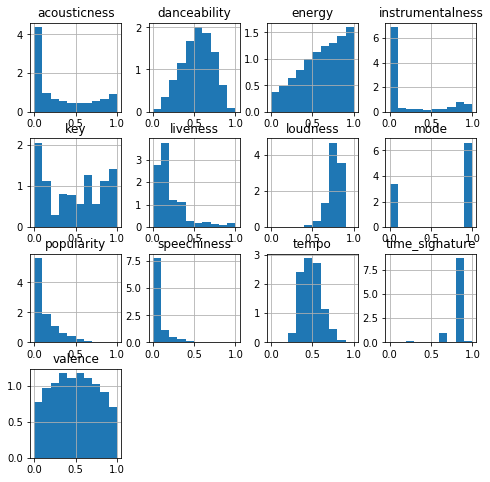

In [72]:
pd.DataFrame(data_scaled,columns=X[columns_for_scaling].columns).hist(figsize=(8,8), normed=True);

In [117]:
data_for_model = np.concatenate((data_scaled,genres_hashed_array),axis=1)

In [119]:
len(data_scaled)

574018

Data is scaled and ready to be fed to the model

# Normalization - Skipping for Now

In [61]:
import sys

In [62]:
np.set_printoptions(suppress=True)

In [65]:
data_scaled[7]

array([0.18556701, 0.85040161, 0.58375125, 0.0846    , 0.        ,
       1.        , 0.696     , 0.69854981, 1.        , 0.03660807,
       0.39780036, 0.8       , 0.396     ])

In [69]:
columns_for_normalization = columns_for_scaling

In [70]:
columns_for_normalization

Index(['popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [67]:
normalizer = Normalizer()
data_normalized = normalizer.fit_transform(data_scaled)

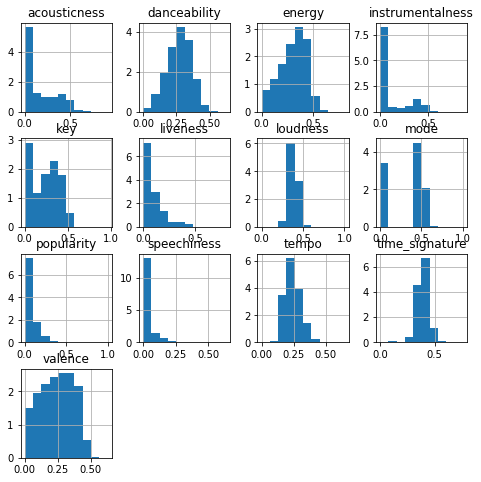

In [73]:
# Valence isn't scaled appropriately
# will have to scale before normalizing
pd.DataFrame(data_normalized,columns=columns_for_normalization).hist(figsize=(8,8), normed=True);

# K-Nearest Neighbors Classifier w/ Data_scaled

In [74]:
# instantiating model class
knn1 = NearestNeighbors(n_neighbors=100,algorithm='kd_tree',leaf_size=10, n_jobs=-1)

# fitting model
model_1 = knn1.fit(data_normalized)

In [76]:
# running model to test output
knn_results1 = knn1.kneighbors([data_normalized[1]])[1]

In [77]:
knn_results1[0]

array([     1,  68090, 492393, 436810, 175401,  36970, 350778, 238362,
       559862, 407590, 436203, 198289, 445580, 270596, 348317, 385085,
       495479, 286524,  19843, 392334, 227259, 234488,  16849, 241190,
       535388,  83251, 405822, 238792, 219910, 290143, 384135,  44924,
       268999, 316062, 538471, 512272, 495177, 108121, 115150,  40877,
       372283, 192022, 214562,  96860, 119015, 447675, 282492, 115529,
        75342,  50346,  77680,  67393, 178426, 122467, 335130, 426570,
       192027, 495808,   3059,  95139, 290196, 228060, 249254, 308586,
        31047,  80343,  64344, 281727, 384838, 150371, 374384, 380801,
       488183,  80351, 320050,   2452, 133385, 530514, 152024,  93001,
       317684, 162792,   1776, 412629, 188406, 424294,  65940, 356165,
       536556,  94629, 379048,  67844, 405370, 376613, 374535, 471877,
       242364, 351514,  79804, 398253])

In [80]:
df = pickle.load(open("./data/song_list_v5_hashed.pkl", "rb"))

In [89]:
pd.DataFrame(df.loc[1][0:19])

,1
songid,41RpZW2lxAdnqDd2nMBzLQ
popularity,15
acousticness,4.54e-05
artist,Hudson Mohawke
danceability,0.662
duration_ms,138960
energy,0.823
instrumentalness,0.952
key,4
liveness,0.343


In [91]:
pd.set_option('display.max_colwidth', -1)

/Users/user/.local/share/virtualenvs/model_notebooks-inW34qmC/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [92]:
counter = 0
for result in knn_results1[0]:
    counter += 1
    print(counter)
    display(pd.DataFrame(df.loc[result][0:1]),pd.DataFrame(df.loc[result][17:18]))

1


,1
songid,41RpZW2lxAdnqDd2nMBzLQ


,1
genres,"['bass music', 'scottish electronic', 'scottish hip hop', 'uk experimental electronic', 'wonky']"


2


,68090
songid,3GlkjwXjM5Bgfz4lNfbFUz


,68090
genres,"['dub', 'reggae', 'rock steady', 'roots reggae', 'ska']"


3


,492393
songid,0O3db9x93twYwR8ckduDc2


,492393
genres,"['drum and bass', 'liquid funk', 'uk dnb']"


4


,436810
songid,03cIxujvTyV0sNShMoONGH


,436810
genres,"['downtempo', 'livetronica', 'new tribe', 'psychedelic trance', 'psychill']"


5


,175401
songid,1evg97yUsUGcqUcF2Wu5NX


,175401
genres,"['full on', 'psychedelic trance']"


6


,36970
songid,1EyR9ykNVYuhBiMi14Bg7x


,36970
genres,"['alternative hip hop', 'boom bap', 'east coast hip hop', 'hardcore hip hop', 'hip hop', 'queens hip hop', 'turntablism']"


7


,350778
songid,4QVcr63WEHP9ofwDs3vAhn


,350778
genres,"['drill and bass', 'electronica', 'glitch', 'indietronica', 'intelligent dance music', 'microhouse', 'minimal techno']"


8


,238362
songid,23z6WXALRFTeEwA25kQJNT


,238362
genres,"['electropop', 'metropopolis', 'swedish alternative rock', 'swedish electropop', 'swedish pop']"


9


,559862
songid,5570AOqQfWpmHAcRVywpcE


,559862
genres,"['progressive house', 'progressive trance', 'uplifting trance']"


10


,407590
songid,1uHmO3Uo9pkJ8uii3f8E9y


,407590
genres,"['darkstep', 'drum and bass', 'liquid funk', 'neurofunk']"


11


,436203
songid,2bx3heulXGe3D2MoICVw8F


,436203
genres,"['reggae en espanol', 'spanish reggae']"


12


,198289
songid,4QxWH1nRVPlThJUGi8XlaQ


,198289
genres,"['electro jazz', 'nu jazz']"


13


,445580
songid,4iB8tsFTPqOAnrCBsz3Baa


,445580
genres,"['chillhop', 'downtempo', 'electronica', 'ninja', 'nu jazz', 'turntablism']"


14


,270596
songid,4FH66inNFuz51Am43PepjY


,270596
genres,"['nu skool breaks', 'progressive house', 'progressive trance', 'tech house', 'trance', 'uplifting trance']"


15


,348317
songid,2koTAFQSkzot94h5qwpJWL


,348317
genres,['electro']


16


,385085
songid,4DHZWAshPCZkYHC64UoLeK


,385085
genres,"['electro jazz', 'electro swing', 'electronica', 'nu jazz']"


17


,495479
songid,1TL0KCey064JCYMecsHRsh


,495479
genres,"['alternative dance', 'chamber psych', 'dance-punk', 'electronic rock', 'indie rock', 'new rave', 'shimmer pop']"


18


,286524
songid,6t9aQLS7yu3Wwl0cNyVEy1


,286524
genres,"['deep jazz fusion', 'jazz fusion']"


19


,19843
songid,7DdRwUDV79pDhdbLBmfSuD


,19843
genres,"['classic norwegian pop', 'norwegian hip hop', 'norwegian pop', 'norwegian pop rap']"


20


,392334
songid,5z5M0nDv7WDeXLiVH5Qr5p


,392334
genres,"['jazz funk', 'jazz fusion']"


21


,227259
songid,7hrunPbxAuvcHp7WWkyTIB


,227259
genres,"['dance pop', 'pop']"


22


,234488
songid,7vtcfTfzRK364hF8MjXF5f


,234488
genres,"['modern blues rock', 'rebel blues']"


23


,16849
songid,3rnPBNAI86ZA824Z2qKKvV


,16849
genres,"['rock steady', 'ska', 'ska punk', 'ska revival', 'traditional ska']"


24


,241190
songid,1KXjC29ZCaxHj38UVnodaX


,241190
genres,"['electro house', 'electronica', 'filter house', 'turntablism']"


25


,535388
songid,2biS8aAzmYUl6cIbJKkxrL


,535388
genres,"['chillhop', 'jazz boom bap']"


26


,83251
songid,1q9x3FJA68n4HPuBeYHgL0


,83251
genres,"['drum and bass', 'drumfunk', 'liquid funk', 'uk dnb']"


27


,405822
songid,0RyjKuvXiUFQrkRlXUiSsY


,405822
genres,"['malmo indie', 'swedish synthpop']"


28


,238792
songid,1nNq4Ry4dhBx7CpfTxTgWe


,238792
genres,['uk dub']


29


,219910
songid,2W47xulOCbukZ2AGpVcRD2


,219910
genres,"['lovers rock', 'rock steady']"


30


,290143
songid,0HDGk17qvVshdbKaPlcgxK


,290143
genres,"['gothic metal', 'neue deutsche harte']"


31


,384135
songid,0zGWnbLIP9Ov1S0ygSejjT


,384135
genres,"['drum and bass', 'drumfunk', 'liquid funk', 'neurofunk', 'uk dnb']"


32


,44924
songid,2PIBj3Jnq9JdYxHyj6RCOp


,44924
genres,"['acid house', 'ambient industrial', 'art rock', 'british experimental', 'experimental', 'experimental pop', 'experimental rock', 'industrial', 'industrial rock', 'no wave', 'post-punk', 'uk post-punk']"


33


,268999
songid,2YdeTItBdm1sR1twLBTNoJ


,268999
genres,"['noise punk', 'noise rock']"


34


,316062
songid,4nfdcxu7Kvkr2bcKxfnZyP


,316062
genres,['shred']


35


,538471
songid,1U0tFlRuErRt4APWINRNTK


,538471
genres,['progressive jazz fusion']


36


,512272
songid,0Q5xSNgSoHStZh9OuSAat1


,512272
genres,['filthstep']


37


,495177
songid,1G9l5r5Fc65J7DZPAEk5lA


,495177
genres,"['catstep', 'kawaii future bass', 'otacore']"


38


,108121
songid,51gRkY2DI0otFhE1hBuADq


,108121
genres,"['instrumental rock', 'jazz fusion', 'neo classical metal', 'shred']"


39


,115150
songid,4AH6oaTOJuPELsf0TnhmSz


,115150
genres,"['dance pop', 'funk', 'hip pop', 'minneapolis sound', 'neo soul', 'new jack swing', 'quiet storm', 'r&b', 'soul', 'urban contemporary']"


40


,40877
songid,0h0KgtXuWabQQ0ZaU6pAXc


,40877
genres,"['edm', 'progressive house', 'progressive trance', 'trance']"


41


,372283
songid,0BV1LAbrGT5O7xy0gGA3QW


,372283
genres,['comic']


42


,192022
songid,0heb17V634CHk3dSs0wwJM


,192022
genres,"['frankfurt electronic', 'future ambient']"


43


,214562
songid,33finv9Rn8YMD8ysKrBoGf


,214562
genres,"['ambient idm', 'future ambient', 'icelandic electronic']"


44


,96860
songid,4cZWOFytTzzgPu4cdvYnXT


,96860
genres,"['chicago house', 'deep house', 'disco house', 'tech house', 'vocal house']"


45


,119015
songid,3lSiQLig4lMWSYouRcFPQr


,119015
genres,"['dance-punk', 'disco house', 'electro house', 'filter house', 'new rave', 'ninja']"


46


,447675
songid,4OiW5Ujm0y4HMJTicCL2Dl


,447675
genres,['psychedelic trance']


47


,282492
songid,0p9iglf7k9x5x7w9hG8uhC


,282492
genres,"['instrumental rock', 'philly indie']"


48


,115529
songid,16IyKYjV9zIPggsfooBGtl


,115529
genres,"['ethereal wave', 'medieval folk', 'neoclassical', 'world fusion']"


49


,75342
songid,5kV71wJicISVn08Gx0fCHB


,75342
genres,"['deep progressive trance', 'organic electronic']"


50


,50346
songid,2XF7qquG8CohybtyiPvh2t


,50346
genres,"['britpop', 'madchester']"


51


,77680
songid,1IF92DM9GgWH5ULGzRyXNL


,77680
genres,"['progressive electro house', 'progressive house']"


52


,67393
songid,7MUVlI2my9eh78SGEBzF8M


,67393
genres,['full on']


53


,178426
songid,4t8rpBjDDBGZRKsTDlJq30


,178426
genres,"['dance pop', 'hip pop', 'neo soul', 'new jack swing', 'pop', 'r&b', 'urban contemporary']"


54


,122467
songid,6Te8oM4RYiPlI1oeacdEYV


,122467
genres,"['psychedelic trance', 'psychill']"


55


,335130
songid,3No8LQDPgZxlL0RMZqmaxe


,335130
genres,"['drum and bass', 'jump up', 'liquid funk', 'uk dnb']"


56


,426570
songid,3LbbvQGOvVp8pobqRc1kLF


,426570
genres,"['bubble trance', 'eurodance']"


57


,192027
songid,3doXbHOT1JiQ206W7iDiQm


,192027
genres,['psychobilly']


58


,495808
songid,04ZetX1hNUwXoXy8MLuRu3


,495808
genres,"['alternative dance', 'chamber psych', 'dance-punk', 'electronic rock', 'indie rock', 'new rave', 'shimmer pop']"


59


,3059
songid,0YxSPBjfwyltJUXNEamEgE


,3059
genres,"['drum and bass', 'drumfunk']"


60


,95139
songid,3qx0e7BAXSR02fBE0GKTeo


,95139
genres,"['album rock', 'art rock', 'blues', 'blues rock', 'british blues', 'classic rock', 'country rock', 'electric blues', 'hard rock', 'instrumental rock', 'jazz fusion', 'psychedelic rock', 'rock', 'symphonic rock']"


61


,290196
songid,7d48jP41HpLwLZmhlGnCVN


,290196
genres,"['alternative dance', 'art pop', 'dance pop', 'dance-punk', 'electronica', 'electropop', 'indie pop', 'indie rock', 'indietronica', 'modern rock', 'neo-synthpop', 'new rave']"


62


,228060
songid,4Y7g9Z5FoWfyp8XOgiuk87


,228060
genres,"['canadian folk', 'canadian singer-songwriter', 'folk', 'folk rock', 'lilith', 'mellow gold', 'pop rock', 'rock', 'singer-songwriter', 'traditional folk']"


63


,249254
songid,5OaxnVWI8UiRsQjVx0G3xq


,249254
genres,['oriental metal']


64


,308586
songid,2bWO7OmLDzFu0euHbL8llO


,308586
genres,"['big beat', 'breakbeat', 'nu skool breaks']"


65


,31047
songid,4unb6ADqEgpWMZLZDvLBWZ


,31047
genres,"['full on', 'psychedelic trance']"


66


,80343
songid,6d6y0iGL28LDX0XIE9inHN


,80343
genres,['uk hip hop']


67


,64344
songid,6zAzAZ7ItRMxLOsBrFjXMn


,64344
genres,"['tribal house', 'vocal house']"


68


,281727
songid,2CMAkzRjMHG7ULqmF2iqmU


,281727
genres,"['eurodance', 'europop', 'german techno', 'hamburg electronic', 'happy hardcore']"


69


,384838
songid,672qJl47iirQlBuCPWTZiB


,384838
genres,"['alternative dance', 'brighton indie', 'dance-punk', 'electronica', 'neo-kraut', 'new rave']"


70


,150371
songid,6PE0gIJKArADECvHY286Eu


,150371
genres,['psychobilly']


71


,374384
songid,0IST5sxJ1nkBun5DBNiROO


,374384
genres,"['palm desert scene', 'space rock', 'stoner metal', 'stoner rock']"


72


,380801
songid,1nzTxktcz9iEzW9vnpkrhd


,380801
genres,"['jazztronica', 'nu jazz']"


73


,488183
songid,0fzqno4YhAnu2WFlAvkpt0


,488183
genres,"['ambeat', 'chillhop', 'jazz boom bap']"


74


,80351
songid,1HxV5s7gpOvGFAk68CPvcP


,80351
genres,"['ebm', 'electro-industrial', 'industrial', 'industrial metal', 'industrial rock']"


75


,320050
songid,4EJwSpuQk2of5o2MnzPlJr


,320050
genres,"['gothic metal', 'melodic death metal', 'metal', 'pagan black metal', 'portuguese black metal', 'portuguese metal', 'portuguese rock', 'symphonic black metal', 'symphonic metal']"


76


,2452
songid,53RFHj2gR8XIXRBY0EcpSV


,2452
genres,"['alternative rock', 'c86', 'dance rock', 'dunedin indie', 'dunedin sound', 'experimental rock', 'garage psych', 'gbvfi', 'indie rock', 'lo-fi', 'no wave', 'noise pop', 'nz indie', 'post-punk', 'punk blues', 'twee pop']"


77


,133385
songid,2nhlIS8mhj7UyUAUrcuabv


,133385
genres,"['bubblegum dance', 'eurodance', 'europop', 'happy hardcore', 'hip house']"


78


,530514
songid,6brdygAtfqp3KDceaBLDZv


,530514
genres,"['dub', 'reggae', 'roots reggae']"


79


,152024
songid,7bWezp3aTeqfhq0x3MAhMi


,152024
genres,['chill lounge']


80


,93001
songid,22gpJ3mnSYHm964wFPNgeW


,93001
genres,"['ambient psychill', 'psychill']"


81


,317684
songid,73eysAGtkuXyl15QlucwcD


,317684
genres,"['french folk pop', 'french reggae']"


82


,162792
songid,4cE4mu8XoalN8nZ5HIPoTP


,162792
genres,['deep idm']


83


,1776
songid,6wup1qjT4xcqC3bmAdYT68


,1776
genres,"['acid house', 'big beat', 'britpop', 'hardcore techno', 'hip house']"


84


,412629
songid,2iNo5Pk4EHABXJ5rqqOe9W


,412629
genres,"['glitch hop', 'intelligent dance music', 'ninja', 'turntablism', 'wonky']"


85


,188406
songid,1x57SgOFVVsnbd5pHNhWaa


,188406
genres,"['darkstep', 'drum and bass', 'drumfunk', 'jump up', 'jungle', 'liquid funk', 'neurofunk']"


86


,424294
songid,5XiJcaYeIow7p4FNBHnvqv


,424294
genres,"['deep jazz fusion', 'jazz fusion']"


87


,65940
songid,7ksjlfxrBOTANBkW3KwCcD


,65940
genres,"['alternative hip hop', 'boom bap', 'hardcore hip hop', 'hip hop', 'southern hip hop', 'underground hip hop', 'west coast rap']"


88


,356165
songid,0pPm7VVxYD1756xQf2zWCX


,356165
genres,"['big beat', 'disco house', 'electronica', 'nu jazz', 'nu skool breaks', 'trip hop']"


89


,536556
songid,0Ty7IbVJ1Akz2nNAuJamNK


,536556
genres,"['anime latino', 'otacore']"


90


,94629
songid,2T1gBd28fusZuabNfy0kTg


,94629
genres,['experimental pop']


91


,379048
songid,5Ovi49OyON7iZtwWOCRcro


,379048
genres,"['bass music', 'dubstep', 'future garage']"


92


,67844
songid,17vxhEeti8ek8qrHf3gdcJ


,67844
genres,['futurepop']


93


,405370
songid,4FXAJnhK56W3CFI2i3GM3p


,405370
genres,['native american']


94


,376613
songid,4aCC4bRL6EaxhDmkaUB82Y


,376613
genres,"['aggrotech', 'dark wave', 'ebm', 'electro-industrial', 'futurepop', 'industrial metal']"


95


,374535
songid,6hj8L363YVCscXVRILBVtf


,374535
genres,"['deep euro house', 'deep melodic euro house', 'electronica', 'german techno', 'microhouse', 'minimal techno', 'tech house']"


96


,471877
songid,4Zvp19QPF9TjcoTh1x8SZH


,471877
genres,"['electro-industrial', 'industrial metal', 'industrial rock']"


97


,242364
songid,4mZc1Zvxqc3Z7KFTxE9gss


,242364
genres,"['jazz funk', 'jazz fusion', 'jazz guitar', 'soul jazz']"


98


,351514
songid,1zxLogKzNDtfPdMBX5RrmQ


,351514
genres,['ghettotech']


99


,79804
songid,6RXHSBZWpgZ2iRozOXfIVT


,79804
genres,"['dub', 'old school dancehall', 'reggae', 'roots reggae']"


100


,398253
songid,6LYKw8uhVDZdqvxMsSCEuq


,398253
genres,['neue deutsche harte']


# Model w/out Hashed Genres

In [30]:
# instantiating model class
knn2 = NearestNeighbors(n_neighbors=21,algorithm='kd_tree')

# fitting model
model2 = knn2.fit(data_scaled)

In [31]:
# running model to test output
knn_results2 = knn2.kneighbors([data_scaled[1]])[1]

In [32]:
knn_results2[0]

array([     1, 492393, 407590, 445580, 238362, 385085, 559862, 535388,
       198289,  36970, 350778,  68090, 436203,  75609,  67393, 495177,
       286524, 192022, 436810,  93001, 530514])

In [33]:
pd.DataFrame(song_list.loc[1005][1:11])

,1005
artist,Jean-michel Rotin
danceability,0.64
duration_ms,256133
energy,0.784
instrumentalness,0.0163
key,1
liveness,0.0355
loudness,-9.452
mode,1
songid,1uR9ohf3yyH1nygTAqqksv


In [34]:
counter = 0 
for result in knn_results2[0]:
    counter += 1 
    print(counter)
    display(pd.DataFrame(song_list.loc[result][10:11]),pd.DataFrame(song_list.loc[result][17:18]))

1


,1
songid,41RpZW2lxAdnqDd2nMBzLQ


,1
genres_stripped,"'bass music', 'scottish electronic', 'scottish..."


2


,492393
songid,0O3db9x93twYwR8ckduDc2


,492393
genres_stripped,"'drum and bass', 'liquid funk', 'uk dnb'"


3


,407590
songid,1uHmO3Uo9pkJ8uii3f8E9y


,407590
genres_stripped,"'darkstep', 'drum and bass', 'liquid funk', 'n..."


4


,445580
songid,4iB8tsFTPqOAnrCBsz3Baa


,445580
genres_stripped,"'chillhop', 'downtempo', 'electronica', 'ninja..."


5


,238362
songid,23z6WXALRFTeEwA25kQJNT


,238362
genres_stripped,"'electropop', 'metropopolis', 'swedish alterna..."


6


,385085
songid,4DHZWAshPCZkYHC64UoLeK


,385085
genres_stripped,"'electro jazz', 'electro swing', 'electronica'..."


7


,559862
songid,5570AOqQfWpmHAcRVywpcE


,559862
genres_stripped,"'progressive house', 'progressive trance', 'up..."


8


,535388
songid,2biS8aAzmYUl6cIbJKkxrL


,535388
genres_stripped,"'chillhop', 'jazz boom bap'"


9


,198289
songid,4QxWH1nRVPlThJUGi8XlaQ


,198289
genres_stripped,"'electro jazz', 'nu jazz'"


10


,36970
songid,1EyR9ykNVYuhBiMi14Bg7x


,36970
genres_stripped,"'alternative hip hop', 'boom bap', 'east coast..."


11


,350778
songid,4QVcr63WEHP9ofwDs3vAhn


,350778
genres_stripped,"'drill and bass', 'electronica', 'glitch', 'in..."


12


,68090
songid,3GlkjwXjM5Bgfz4lNfbFUz


,68090
genres_stripped,"'dub', 'reggae', 'rock steady', 'roots reggae'..."


13


,436203
songid,2bx3heulXGe3D2MoICVw8F


,436203
genres_stripped,"'reggae en espanol', 'spanish reggae'"


14


,75609
songid,1GA5a4fprKfOhfoM0RI5iw


,75609
genres_stripped,"'acid trance', 'bubble trance'"


15


,67393
songid,7MUVlI2my9eh78SGEBzF8M


,67393
genres_stripped,'full on'


16


,495177
songid,1G9l5r5Fc65J7DZPAEk5lA


,495177
genres_stripped,"'catstep', 'kawaii future bass', 'otacore'"


17


,286524
songid,6t9aQLS7yu3Wwl0cNyVEy1


,286524
genres_stripped,"'deep jazz fusion', 'jazz fusion'"


18


,192022
songid,0heb17V634CHk3dSs0wwJM


,192022
genres_stripped,"'frankfurt electronic', 'future ambient'"


19


,436810
songid,03cIxujvTyV0sNShMoONGH


,436810
genres_stripped,"'downtempo', 'livetronica', 'new tribe', 'psyc..."


20


,93001
songid,22gpJ3mnSYHm964wFPNgeW


,93001
genres_stripped,"'ambient psychill', 'psychill'"


21


,530514
songid,6brdygAtfqp3KDceaBLDZv


,530514
genres_stripped,"'dub', 'reggae', 'roots reggae'"


# Pickling model

In [8]:
import pickle

filename = './models/knn_model_v1.pkl'
pickle.dump(model, open(filename, 'wb'))

In [9]:
# pulling in the (now) pickled model
model_pickle = pickle.load(open(filename, 'rb'))

In [10]:
# Loading model to test on scaled data (not pickled data)
pickle_results = model_pickle.kneighbors([data_scaled[1000]])[1]

# displaying output
pickle_results

array([[  1000, 647630, 304823, 412399,  48174, 411195, 240739, 537833,
         50765, 450355, 151925, 707048, 557285, 508280, 175165, 510531,
        652499, 267268, 161932, 587960,  79755]])

# Pickling Scaled Data

In [11]:
filename2 = './data_scaled.pkl'
pickle.dump(data_scaled, open(filename2, 'wb'))

# (OLD) Testing both pickles for dataset, model

In [12]:
# importing libraries (even though they are visible above)
# to illustrate which packages are needed to create the function below

import pandas as pd 
from sklearn.neighbors import NearestNeighbors
import pickle


# this function predicts on a song id

def predict(id):
    #loads in pickled data and model
    X = pickle.load(open('./data_scaled.pkl', 'rb'))
    loaded_pickle = pickle.load(open('./models/knn_model_v1.pkl', 'rb'))
    #calculates results
    results = loaded_pickle.kneighbors([X[id]])[1]
    return results

In [13]:
predict(0)

array([[     0, 341644, 462704, 499704, 105639, 347586,  27005, 553442,
        594846, 273222, 636137, 218622, 375716,  40341, 510427, 518171,
        209537, 168110, 453579, 456931,  89949]])

In [14]:
content = {
    "audio_features": {
        "acousticness": 0.934,
        "danceability": 0.186,
        "energy": 0.107,
        "instrumentalness": 0,
        "key": 5,
        "liveness": 0.297,
        "loudness": -14.802,
        "mode": 1,
        "speechiness": 0.0347,
        "tempo": 107.095,
        "time_signature": 4,
        "valence": 0.149
    }
}

In [15]:
dataframe = pd.DataFrame.from_dict(
        json_normalize(content['audio_features']),
                                orient='columns')

In [16]:
dataframe

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.934,0.186,0.107,0,5,0.297,-14.802,1,0.0347,107.095,4,0.149


In [17]:
dataframe_scaled = scaler.transform(dataframe)

dataframe_scaled

array([[0.937751  , 0.18655968, 0.107     , 0.        , 0.45454545,
        0.297     , 0.68134949, 1.        , 0.03584711, 0.42840913,
        0.8       , 0.149     ]])

In [22]:
import pickle

filename = './models/scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

In [14]:
target = 'songid'

song_id_array = song_list[target]

In [15]:
song_id_array

0         5PS5dpaLogPzYU9hWiWyZb
1         41RpZW2lxAdnqDd2nMBzLQ
2         2poHURuOfVNbzZdivAwtOH
3         1jg9hZnReygpBvV2axGuPy
4         3GsS8jzoixpCnp4jDWCEvb
                   ...          
116091    1xm8J6EFMA6N8JDqH8vzuz
116238    4NwmHBjPb9i9N3naLCMVCG
116261    5Xo8AsEz0gpW6Rpo2jXvBN
116308    4Fnz6vDqufd3ens0Gf9LC5
116324    2tolmRzbUfgL5KRplIqHlu
Name: songid, Length: 728156, dtype: object

In [16]:
sys.getsizeof(song_id_array)

NameError: name 'sys' is not defined

In [17]:
song_id_list = song_id_array.tolist()

In [37]:
sys.getsizeof(song_id_list)

5825312

In [39]:
import pickle

filename = 'Flask_API/SOUNDDRIP/data/song_id_array.pkl'
pickle.dump(song_id_array, open(filename, 'wb'))

In [30]:
import pickle

filename = 'song_id_list2.pkl'
pickle.dump(song_id_list, open(filename, 'wb'))

In [3]:
content = {
    "audio_features": {
        "acousticness": 0.934,
        "danceability": 0.186,
        "energy": 0.107,
        "instrumentalness": 0,
        "key": 5,
        "liveness": 0.297,
        "loudness": -14.802,
        "mode": 1,
        "speechiness": 0.0347,
        "tempo": 107.095,
        "time_signature": 4,
        "valence": 0.149
    }
}

def predict(content):
    print('Loading dataframe...')
    dataframe = pd.DataFrame.from_dict(
        json_normalize(content['audio_features']),
                                orient='columns')
    print('Dataframe Object Created')
    print('Loading pickled scaler...')
    scaler = pickle.load(open('models/scaler.pkl', 'rb'))
    print('Pickled scaler loaded')
    print('Scaling dataframe object...')
    dataframe_scaled = scaler.transform(dataframe)
    print('Dataframe scaled')
    print('Loading pickled model...')
    model = pickle.load(open('./models/knn_model_v1.pkl', 'rb'))
    print('Model loaded')
    results = model.kneighbors([dataframe_scaled][0])[1]
    print('Prediction executed')

    return results


In [4]:
predict(content)

Loading dataframe...
Dataframe Object Created
Loading pickled scaler...


NameError: name 'pickle' is not defined

In [127]:
  # For-loop for returning 20 songs
def all_similarities(data_result):
    similar_songs = []
    print('song_id_list loading...')
    song_id_list = pickle.load(open('Flask_API/SOUNDDRIP/data/song_id_list.pkl', 'rb'))
    print('song_id_list loaded')
    print('beginning for loop...')
    
    for song_row in data_result[0][1:]:
        song_id = song_id_list[song_row]
        similar_songs.append({'similarity': [.99], 'values': song_id})
    json_dict = {"songs": similar_songs}
    return json_dict

In [128]:
all_similarities(predict(content))

Loading dataframe...
Dataframe Object Created
Loading pickled scaler...
Pickled scaler loaded
Scaling dataframe object...
Dataframe scaled
Loading pickled model...
Model loaded
Prediction executed
song_id_list loading...
song_id_list loaded
beginning for loop...


{'songs': [{'similarity': [0.99], 'values': '3JeSeOxS09vw7ZaQXyDtkn'},
  {'similarity': [0.99], 'values': '0lkEvsJLWu7HjurNUnMYqt'},
  {'similarity': [0.99], 'values': '7GrCeh9O4Salm3oEoiDWmf'},
  {'similarity': [0.99], 'values': '705JQ49YZOupAYQXrny5Vb'},
  {'similarity': [0.99], 'values': '7v6maEWDjrKHQMVFoL8Tq3'},
  {'similarity': [0.99], 'values': '6pJeuRa8dj6Hph2r9Unn5H'},
  {'similarity': [0.99], 'values': '1XsXX5Q8mCdlDjroYAUs8r'},
  {'similarity': [0.99], 'values': '6nl7z8eqCRRNSPJevUg5yJ'},
  {'similarity': [0.99], 'values': '4Swt07x4GyojZApyerQ8Ta'},
  {'similarity': [0.99], 'values': '68PGQTrsU7NTe6hfcFD3Fh'},
  {'similarity': [0.99], 'values': '5jTnsVnWuxdSQnRv124hwL'},
  {'similarity': [0.99], 'values': '5YsyWAtEDsStifCxF5d7wJ'},
  {'similarity': [0.99], 'values': '4RKMHiQ1sQCJVcPEbqcXR2'},
  {'similarity': [0.99], 'values': '7dXTqzYBW6LcuMvfmhKjeS'},
  {'similarity': [0.99], 'values': '1pQPfwF8yZejKeu2rZOIwI'},
  {'similarity': [0.99], 'values': '2ydHMFR78xJCTaUSgQsY1d'},

In [111]:
sorted_list = sorted(similarities, key=lambda i: i['similarity'], 
                                                         reverse=True)[:20]
      json_dict = {"songs": sorted_list}
      #data = json.dumps(json_dict)
      return jsonify(json_dict), print('yay')

'70jVRf1KHVa4eROjpdmaja'

# Get Spotify API Token / Output Audio Features

In [1]:
import spotipy
import spotipy.util as util

In [2]:
USERNAME = 'augt12ocf9csxa4s8kbq9reg8' #your spotify username
CLIENT_ID = 'b954b92b9a674e6a9cf7322649da82d1' #set at your developer account
CLIENT_SECRET = '920cd41023994b1a99210243ce8967b2' #set at your developer account
REDIRECT_URI = 'https://google.com/' #set at your developer account, usually "http://localhost:8000"
SCOPE = 'user-library-read' # or else
# ps. REDIRECT_URI is crucial here. if http://localhost:8000 is not set, or with a single '/' misplaced, it will generate a connection error.

# then pass them:

token = util.prompt_for_user_token(username = USERNAME, 
                                   scope = SCOPE, 
                                   client_id = CLIENT_ID, 
                                   client_secret = CLIENT_SECRET, 
                                   redirect_uri = REDIRECT_URI)

if token:
   sp = spotipy.Spotify(auth=token)



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=b954b92b9a674e6a9cf7322649da82d1&response_type=code&redirect_uri=https%3A%2F%2Fgoogle.com%2F&scope=user-library-read in your browser




Enter the URL you were redirected to:  https://www.google.com/?code=AQB6_guH_Q9DO3bhNcW534HrKK8bs0qvOZuuUDkWgYuzBXz-cdVz2uFdXlFM4X3nkXIfZ-yyx5-LVeSxJWtGp5j6cH3PhdznuNqVhfrh02QG0eF38xbO-UiPvtFg-lfr6FudpyjfwIQouNkiDbe6SfGR4yEM_MV7SBFEZ3FA7sWicsF7vXl38ekWg9Qui4D_Awk0pdBTDVkbFAwT


In [4]:
token

'BQAzm9VZMwr75qsRL2WkGWTyRVqFn9OYXIEFEzlOZfijT07_L8W5VBu0KymszA5Eg3n2_4np7yS6zibHQnfDt-DS8GZQ-7heWLAh51v4J15HzBCZhMdLJYZKgVq8aPaWU6Rfj52bmNPKnIUCvClGq-ixU2Laml5q_oUZwN7-sPko'

In [7]:
token_content = {'token': token}

In [8]:
type(token_content)

dict

In [9]:
token_content['token']

'BQAuxAqZlqyiBIPC-2MnrYjFH2amjQm8tLkh_ZYI_HkJ8MUHepG_lQrofpN--fGXM8b3tfXMfshOUvoF2Dkuh8iCepPvIvXqxCfrfSi52Rr8Njq0cnyLpde4_xo1v0-lMDjpMpeEOccK7yV_PPBVadskMoOr'

In [10]:
def get_id(token):
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_saved_tracks()
    song_id = results['items'][0]['track']['id']
    return song_id

In [11]:
def get_features(song_id):
    results_dict = sp.audio_features(song_id)[0]
    audio_features = {"audio_features":{key: results_dict[key] for key in results_dict.keys() & {'danceability', 'energy',
                                                                                                'key', 'loudness', 'mode',
                                                                                                'speechiness', 'acousticness',
                                                                                                'instrumentalness', 'liveness',
                                                                                                'valence', 'tempo', 'time_signature'}}}
        
    return audio_features

In [12]:
 acoustical_features = get_features(get_id(token))

In [13]:
acoustical_features

{'audio_features': {'liveness': 0.204,
  'acousticness': 0.472,
  'key': 9,
  'danceability': 0.889,
  'energy': 0.816,
  'speechiness': 0.247,
  'mode': 1,
  'loudness': -4.67,
  'valence': 0.777,
  'instrumentalness': 0,
  'time_signature': 4,
  'tempo': 96.056}}

# Flask Predict function

In [14]:
def predict(content):
    similar_songs = []
    print('Loading dataframe...')
    dataframe = pd.DataFrame.from_dict(
        json_normalize(content['audio_features']),
                                orient='columns')
    print('Dataframe Object Created')
    print('Loading pickled scaler...')
    scalar = load('scalar2.joblib')
    print('Pickled scaler loaded')
    print('Scaling dataframe object...')
    dataframe_scaled = scalar.transform(dataframe)
    print('Dataframe scaled')
    print('Loading pickled model...')
    model = load('model2.joblib')
    print('Model loaded')
    results = model.kneighbors([dataframe_scaled][0])[1]
    print('Prediction executed')
    print('song_id_list loading...')
    song_id_list = load('song_id_list2.joblib')
    print('song_id_list loaded')
    
    print('beginning for loop...')
    for song_row in results[0][1:]:
        song_id = song_id_list[song_row]
        similar_songs.append({'similarity': [.99], 'values': song_id})
    json_dict = {"songs": similar_songs}
    return json_dict


In [17]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from flask import request
from joblib import dump
from joblib import load

import pandas as pd
from pandas.io.json import json_normalize
from flask import jsonify

In [18]:
%timeit

predict(acoustical_features)

Loading dataframe...
Dataframe Object Created
Loading pickled scaler...
Pickled scaler loaded
Scaling dataframe object...
Dataframe scaled
Loading pickled model...
Model loaded
Prediction executed
song_id_list loading...
song_id_list loaded
beginning for loop...


{'songs': [{'similarity': [0.99], 'values': '5YdNeg0onlsEFoNdFjwG9X'},
  {'similarity': [0.99], 'values': '3XDPtaCpjC83LW1E7wfeVW'},
  {'similarity': [0.99], 'values': '6Ycon1DmLHH4xVVZaJqEdI'},
  {'similarity': [0.99], 'values': '6T8DFxrmY8y03FGYDxkmpg'},
  {'similarity': [0.99], 'values': '0lO6VPXcW9wIOKxZ0wecjG'},
  {'similarity': [0.99], 'values': '56KyV36puztkiJ62ca3D1t'},
  {'similarity': [0.99], 'values': '2UUIpe2Jtflo8dX9jeTSqQ'},
  {'similarity': [0.99], 'values': '6lneyspCLiV4hfccAidPeU'},
  {'similarity': [0.99], 'values': '4nKjzgBwU9ksBUG4VJ787c'},
  {'similarity': [0.99], 'values': '6galGfTFHHzsPieYkReYyN'},
  {'similarity': [0.99], 'values': '7F9Dbj9ul1FtOPcsXDF3R9'},
  {'similarity': [0.99], 'values': '0e7jY6MjiJdKNwUiwDhyxM'},
  {'similarity': [0.99], 'values': '1LVfv8UzT0Zw3YjAbfcl4U'},
  {'similarity': [0.99], 'values': '3QUgFGZvPhtdioo1MRepuE'},
  {'similarity': [0.99], 'values': '6SuyOjhiF6vssCI7URWLDZ'},
  {'similarity': [0.99], 'values': '015p8TgFahkz0viuux9YGJ'},

# Dump

In [12]:
dump(model, 'model2.joblib', compress=True)

['model2.joblib']

In [4]:
# %time

# pickle_loaded = pickle.load(open('Flask_API/SOUNDDRIP/models/knn_model_v1.pkl', 'rb'))
# joblib_loaded = load('model.joblib')



In [5]:
# dump(data_scaled, 'data_scaled.joblib', compress=True)

In [13]:
dump(scaler, 'scalar2.joblib', compress=True)

['scalar2.joblib']

In [18]:
dump(song_id_list, 'song_id_list2.joblib', compress=True)

['song_id_list2.joblib']